In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
train_image,test_images = train_images/255.0, test_images/255.0

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a deep learning model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Add Flatten and Dense layers inside the Sequential model
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2884 - loss: 2.4348 - val_accuracy: 0.1000 - val_loss: 2.3271
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5044 - loss: 1.3889 - val_accuracy: 0.1000 - val_loss: 2.4014
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5714 - loss: 1.2215 - val_accuracy: 0.1020 - val_loss: 2.5096
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6165 - loss: 1.1013 - val_accuracy: 0.1018 - val_loss: 2.6361
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6526 - loss: 1.0049 - val_accuracy: 0.1001 - val_loss: 2.8454
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6761 - loss: 0.9304 - val_accuracy: 0.1238 - val_loss: 2.8312
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7014 - loss: 0.8580 - val_accuracy: 0.1257 - val_loss: 2.8192
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7246 - loss: 0.8055

## Evaluate the model

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1227 - loss: 2.9937
Test accuracy: 0.11800000071525574


# Visualize traning

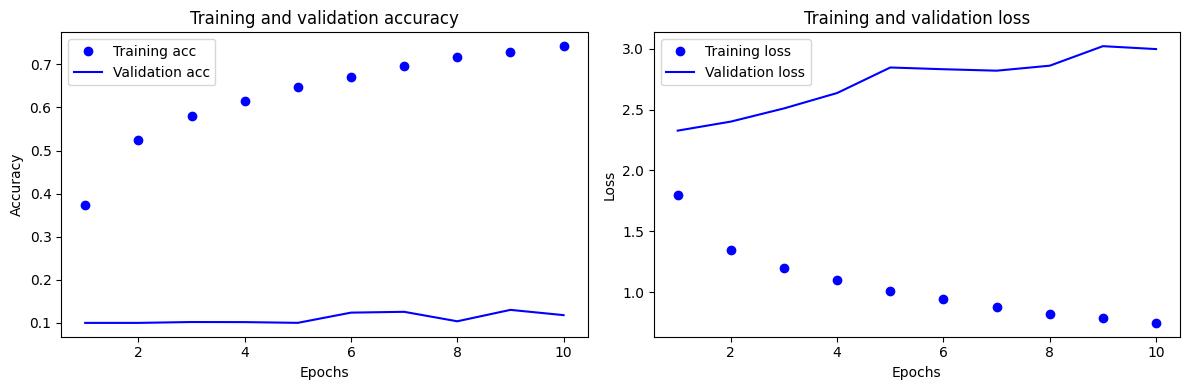

In [ ]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Visualize for predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


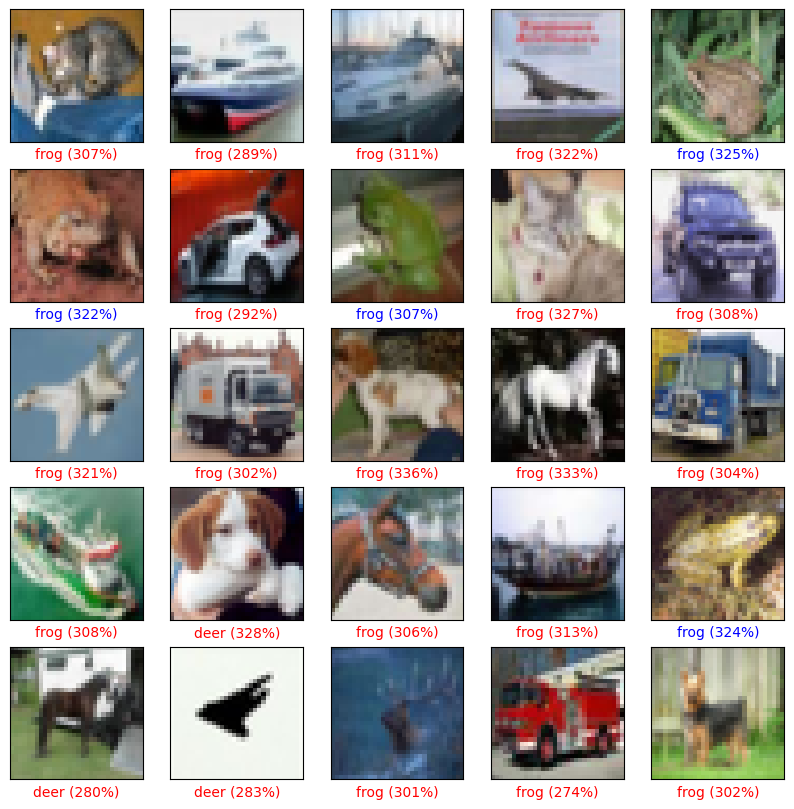

In [ ]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    predictions = model.predict(test_images)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid (False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions[i]):2.0f}%)", color=color)

# Call the function to plot example predictions
plot_example_predictions()